In [7]:
import hypergraphx

In [1]:
from hypergraphx.readwrite import read_hif, write_hif

In [2]:
H = read_hif("data/lesmis.hif.json")

No hypergraph type - assume undirected


In [3]:
# Print the number of nodes and hyperedges
print("Number of nodes: {}".format(H.num_nodes()))
print("Number of hyperedges: {}".format(H.num_edges()))

Number of nodes: 80
Number of hyperedges: 191


In [4]:
from hypergraphx.motifs import compute_motifs

m = compute_motifs(H, runs_config_model=3)

Computing observed motifs of order 3...
Computing config model motifs of order 3. Step: 1
1600 steps completed.
Computing config model motifs of order 3. Step: 2
1600 steps completed.
Computing config model motifs of order 3. Step: 3
1600 steps completed.


In [5]:
delta = m["norm_delta"]
motif_profile = [i[1] for i in delta]

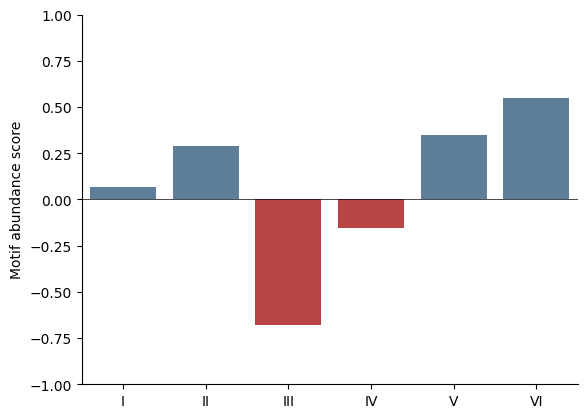

In [6]:
from hypergraphx.viz import plot_motifs

plot_motifs(motif_profile)